In [96]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

In [97]:
#Loading data
df = fetch_california_housing(as_frame = True)
#print(df)


In [98]:
df['data'].head()
df['target'].head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [99]:
#Checking data, if there is any missing values
df['data'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [100]:
df['target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [101]:
# As data looks good, spliting data in depndent and independent variable. 'x' is independent variable and 'y' is dependent variable.
x = data_set['data']
print(x)
y = data_set['target']
print(y)

#Checking how the shape and skize of data looks like.
print(x.shape)
print(y.shape)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -12

In [102]:
x['target'] = y #Stiching target values in one data frame for better visualization.

In [103]:
x.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


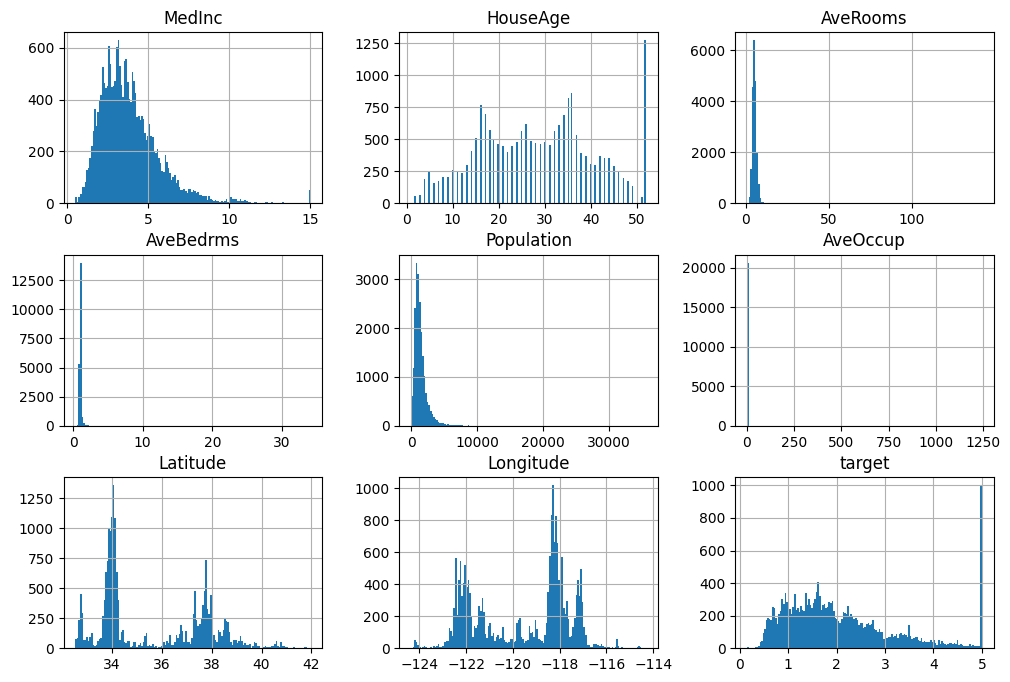

In [104]:
#Visualizing data and checking the scale
x.hist(bins=150, figsize=(12,8))
plt.show()

In [105]:
#Looks the feature target and HouseAge is caped by 0 to 5 and 0 to 52 respectively. Also the scaling is different for every feature. Need a preprocess.
x.max()

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup       1243.333333
Latitude         41.950000
Longitude      -114.310000
target            5.000010
dtype: float64

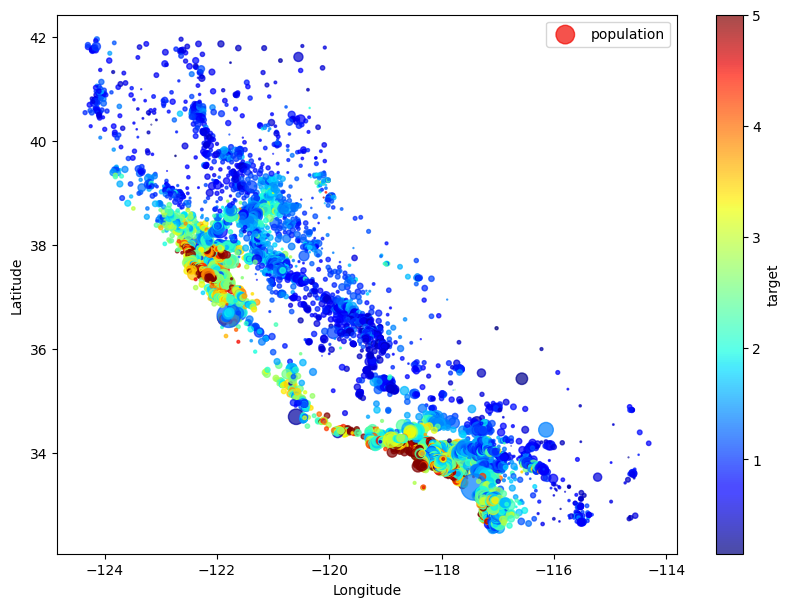

In [106]:
# Feature Selection
# As per general hypothesis, housing prices always based upon location. By this chat it is showing the same.
x.plot(kind='scatter', x='Longitude',y='Latitude', c='target', cmap='jet', colorbar=True, legend=True, sharex=False, figsize=(10,7), s=x['Population']/100, label='population', alpha=0.7)
plt.show()

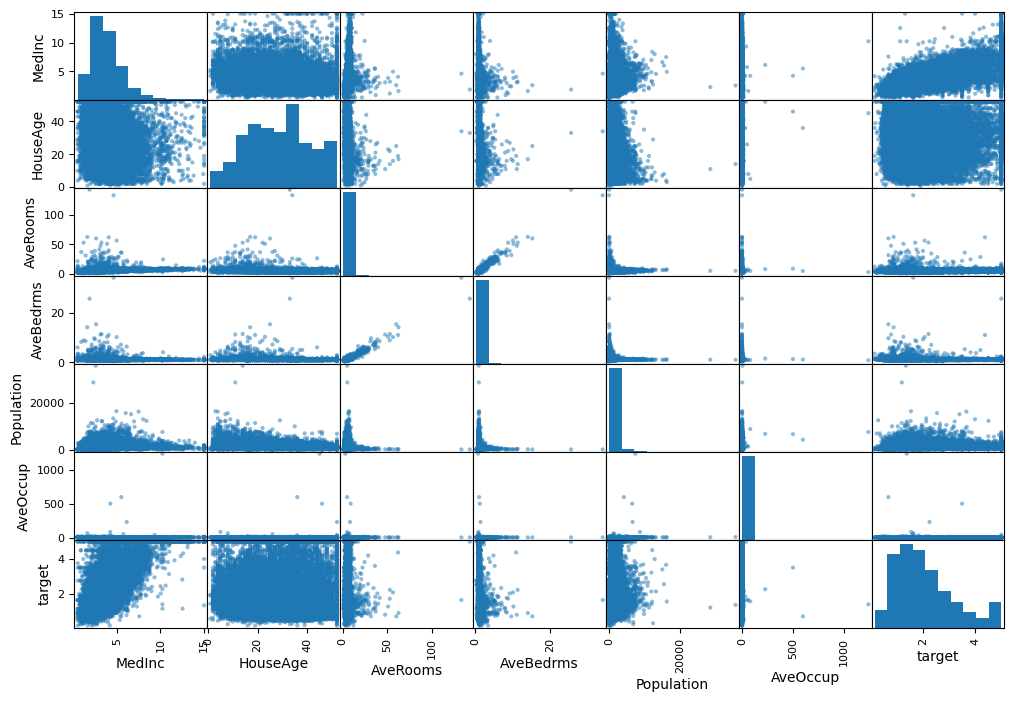

In [107]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','target']
scatter_matrix(x[attributes], figsize=(12,8))
plt.show()

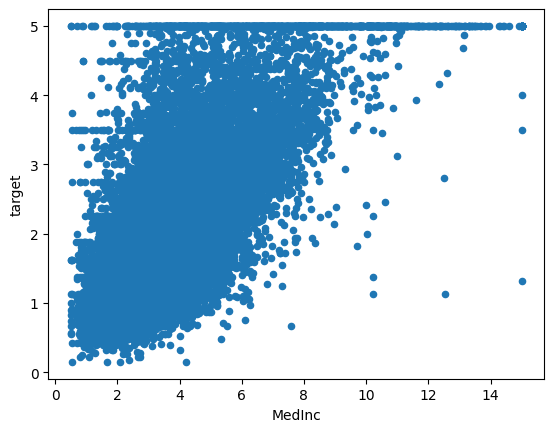

In [108]:
x.plot(kind="scatter", x="MedInc",y="target")
plt.show()

In [109]:
#Checking the correlation
corr = x.corr()
corr['target'].sort_values(ascending=True)

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
target        1.000000
Name: target, dtype: float64

In [114]:
#Median_Income is highly correlated with target than other features.
#Spliting data inot train test for modeling.
xi = df['data']
yi = df['target']
x_train, x_test, y_train, y_test = train_test_split(xi,yi, test_size=0.20)

In [115]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [116]:
r2_err = r2_score(y_test,y_pred)
mse_err = mean_squared_error(y_test,y_pred)

print(r2_err,mse_err)

0.5944141674504857 0.5424793425665138
